# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import csv file

In [10]:
df_candy = pd.read_csv("/Users\Lenovo\Documents\candy-data.csv")

In [11]:
df_candy.head(3)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086


# Get to know my data

In [12]:
# Largest values for DV "winpercent"
df_candy.sort_values(by="winpercent", ascending=False).head(5)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
52,Reese's Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290
51,Reese's Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257
79,Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914
28,Kit Kat,1,0,0,0,0,1,0,1,0,0.313,0.511,76.768600
64,Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782


In [13]:
# Smallest values for DV "winpercent"
df_candy.sort_values(by="winpercent").head(5)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
44,Nik L Nip,0,1,0,0,0,0,0,0,1,0.197,0.976,22.445341
7,Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,23.417824
12,Chiclets,0,1,0,0,0,0,0,0,1,0.046,0.325,24.524988
72,Super Bubble,0,1,0,0,0,0,0,0,0,0.162,0.116,27.303865
26,Jawbusters,0,1,0,0,0,0,1,0,1,0.093,0.511,28.127439


In [14]:
# Average of DV "winpercent"

print("Sum of all winpercent: " + str(sum(df_candy["winpercent"])))
print("Number of Datapoints: " + str(len(df_candy["winpercent"])))
print("The average is " + str(sum(df_candy["winpercent"]) / len(df_candy["winpercent"])))

Sum of all winpercent: 4276.924924000001
Number of Datapoints: 85
The average is 50.316763811764716


In [15]:
# Median of DV "winpercent" = average of 42nd and 43rd value = 41st and 42nd Index divided by two

series_winpercent = df_candy["winpercent"]
sorted_series_winpercent = series_winpercent.sort_values()
print("42nd value: " + str(sorted_series_winpercent.iloc[41]))
print("43rd value: " + str(sorted_series_winpercent.iloc[42]))

print("The median is " + str((sorted_series_winpercent.iloc[41] + sorted_series_winpercent.iloc[42]) / 2))

42nd value: 47.173229
43rd value: 47.829754
The median is 47.5014915


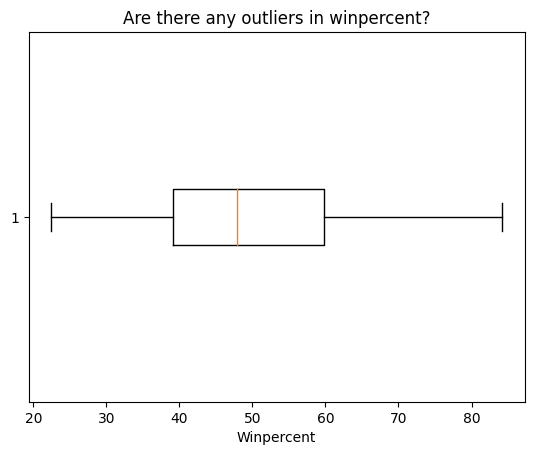

In [16]:
# Check boxplot DV "winpercent" for outliers
plt.boxplot(df_candy["winpercent"], vert = 0)
plt.title("Are there any outliers in winpercent?")
plt.xlabel("Winpercent")
plt.show()

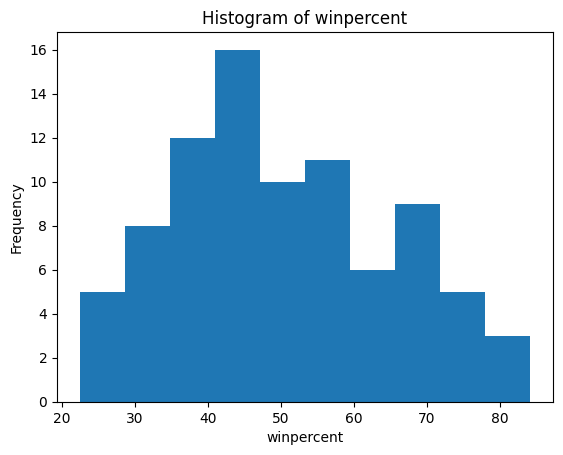

In [17]:
# Inspect histogram of DV "winpercent" to assess distribution 
plt.hist(df_candy["winpercent"])
plt.title("Histogram of winpercent")
plt.xlabel("winpercent")
plt.ylabel("Frequency")
plt.show()

# Do the same for IVs "sugarpercent" and "pricepercent"

# Inspect other IVs "chocolate", "fruity", etc.

In [18]:
# Find out distribution of IV "chocolate"

print(sum(df_candy["chocolate"]))
print(len(df_candy["chocolate"]))
print("The proportion of candy that contains chocolate is " + str(sum(df_candy["chocolate"]) / len(df_candy["chocolate"])))


37
85
The proportion of candy that contains chocolate is 0.43529411764705883


# Do the same for the rest of the dichotomous IVs

In [19]:
# Find out distribution of IV "fruity"

print(sum(df_candy["fruity"]))
print(len(df_candy["fruity"]))
print("The proportion of candy that is fruity is " + str(sum(df_candy["fruity"]) / len(df_candy["fruity"])))

# Etc. pp.


38
85
The proportion of candy that is fruity is 0.4470588235294118


# Do Multiple Linear Regression Analysis

In [20]:
y = df_candy["winpercent"].values
print(y)

[66.971725 67.602936 32.261086 46.116505 52.341465 50.347546 56.914547
 23.417824 38.010963 34.517681 38.975037 36.017628 24.524988 42.272076
 39.460556 43.088924 39.185505 46.783348 57.11974  34.158958 51.41243
 42.178772 55.375454 62.284481 56.490501 59.236122 28.127439 57.21925
 76.7686   41.389557 39.141056 52.911392 71.46505  66.574585 46.411716
 55.064072 73.099556 60.800701 64.35334  47.829754 54.526451 55.354046
 70.735641 66.47068  22.445341 39.4468   46.296597 69.483788 37.722336
 41.265511 37.348522 81.866257 84.18029  73.43499  72.887901 35.290756
 65.716286 29.703691 42.849144 34.722    63.08514  55.103695 37.887188
 45.995827 76.673782 59.529251 59.863998 52.825947 67.037628 34.578991
 33.43755  32.230995 27.303865 54.861111 48.982651 43.068897 45.736748
 49.653503 47.173229 81.642914 45.466282 39.011898 44.375519 41.904308
 49.524113]


In [21]:
X = df_candy[["chocolate", "fruity", "caramel", "peanutyalmondy", "nougat", "crispedricewafer", "hard", "bar", "pluribus", "sugarpercent", "pricepercent"]].values
print(X)

[[1.         0.         1.         0.         0.         1.
  0.         1.         0.         0.73199999 0.86000001]
 [1.         0.         0.         0.         1.         0.
  0.         1.         0.         0.60399997 0.51099998]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.011      0.116     ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.011      0.51099998]
 [0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.90600002 0.51099998]
 [1.         0.         0.         1.         0.         0.
  0.         1.         0.         0.465      0.76700002]
 [1.         0.         1.         1.         1.         0.
  0.         1.         0.         0.60399997 0.76700002]
 [0.         0.         0.         1.         0.         0.
  0.         0.         1.         0.31299999 0.51099998]
 [0.         0.         0.         0.         0.        

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
regr = LinearRegression()

In [24]:
regr.fit(X, y)

LinearRegression()

In [25]:
#predict the "winpercent" of a candy like "100 Grand" (real rating = 66.97) which contains "chocolate", "caramel", "crispedricewafer", "bar", and 0.73 "sugarpercent" and 0.86 "pricepercent":
predicted_winpercent = regr.predict([[1, 0, 1, 0, 0, 1, 0, 1, 0, 0.73, 0.86]])
print(predicted_winpercent)

[67.40198272]


In [26]:
# Find out regression coefficients for regression equation, explanation: 1.00 increase in characteristic explains which increase in "winpercent"?
print(regr.coef_)

[19.74806698  9.42232207  2.22448136 10.07068847  0.8043306   8.91896981
 -6.1653265   0.44154009 -0.85449954  9.08676286 -5.92836143]


In [27]:
# Note for me: it seems that "chocolate", "fruit", "caramel", "peanutyalmondy"=good; "nougat"=doesnt matter; "crispedricewafer"=good; "hard"=bad; "bar", "pluribus"=dont matter; 1.00 more sugar=better but sugar is measured in 0.xx; 1.00 higher price=worse but price is measured in 0.yy

In [28]:
# I still havent calculated Rsquared,statistical significance, Confidence Intervalls, checked assumptions (work in progress...)